**Part 3B**

**Instructions:**

See the instructions in the pdf file provided in **Instructions and details for all parts**

- Use this notebook to 
> - show the work you carried out to produce a prediction model and comma delimited file with your predictions of DSHARES in the test dataset.
> - show the work you carried out to produce your estimate of M, the mean absolute error in predicting log(1+DSHARES)
> - provide your estimate of M in the cell provided
- You need to upload the comma delimited file for part 3A 
- You need to upload this notebook or part 3B.

Use any number of cells you need to for your work. 
Make sure you assign a value to M and print it in the last (print) cell provided.

import numpy as np
import pandas as pd
import datetime

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

In [81]:
df.isnull().sum()

TRANS_DATE                           0
ASHARES                              0
TRANS_PRICEPERSHARE                  0
DSHARES                              0
logDSHARES                           0
                                    ..
logASHARES logPRICEPERSHARE          0
logASHARES logPRICEPERSHARE          0
logPRICEPERSHARE^2                   0
logPRICEPERSHARE logPRICEPERSHARE    0
logPRICEPERSHARE^2                   0
Length: 183, dtype: int64

**Visualization**

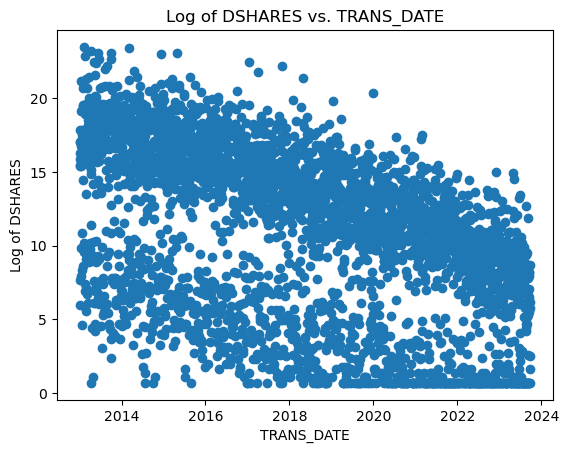

In [2]:
df = pd.read_csv('C:/AMS/jupyter_practice/Final Project/Part3/train061.csv')

df['TRANS_DATE'] = pd.to_datetime(df['TRANS_DATE'])
df['logDSHARES'] = np.log1p(df['DSHARES'])

plt.scatter(df['TRANS_DATE'], df['logDSHARES'])

plt.title('Log of DSHARES vs. TRANS_DATE')
plt.xlabel('TRANS_DATE')
plt.ylabel('Log of DSHARES')
plt.show()

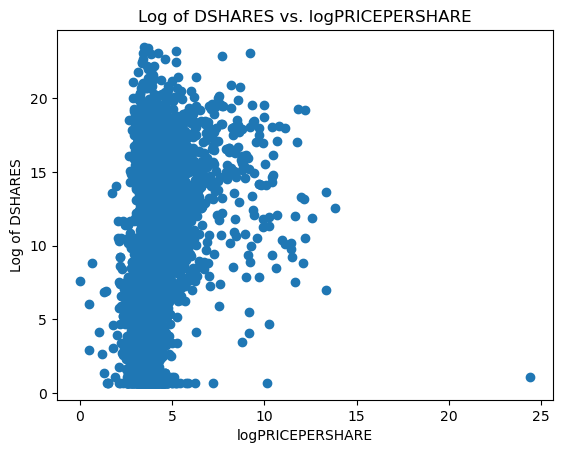

In [3]:
df['logPRICEPERSHARE'] = np.log1p(df['TRANS_PRICEPERSHARE'])

plt.scatter(df['logPRICEPERSHARE'], df['logDSHARES'])
plt.title('Log of DSHARES vs. logPRICEPERSHARE')
plt.xlabel('logPRICEPERSHARE')
plt.ylabel('Log of DSHARES')
plt.show()

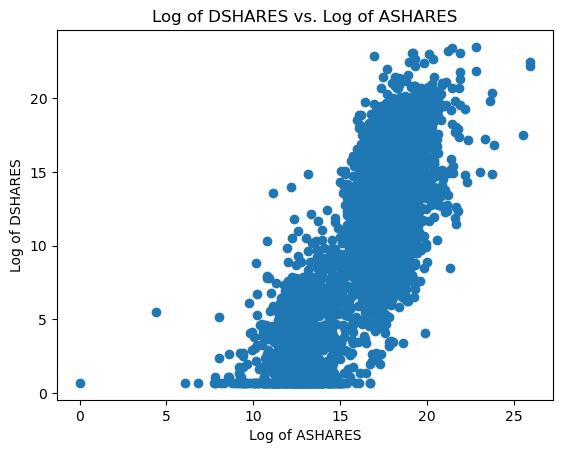

In [4]:
df['logASHARES'] = np.log1p(df['ASHARES'])
plt.scatter(df['logASHARES'], df['logDSHARES'])
plt.title('Log of DSHARES vs. Log of ASHARES')
plt.xlabel('Log of ASHARES')
plt.ylabel('Log of DSHARES')
plt.show()

0.512 means that the standard deviation is about 51.2% of the mean. This is a relatively high coefficient of variation, indicating that the variability of the data is significant relative to its mean value.

SD: 5.609464119900048
CV: 0.5124480783761608


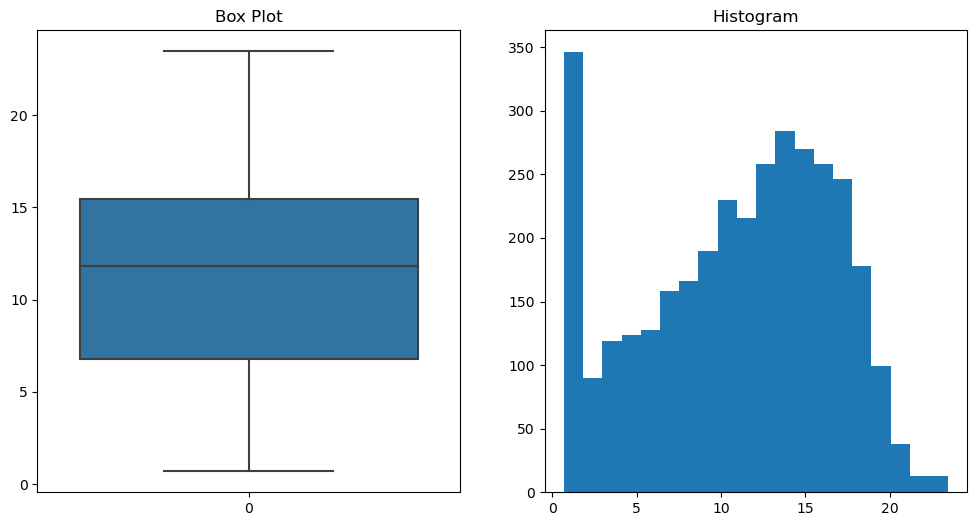

In [5]:
import seaborn as sns

data = df['logDSHARES']

std_dev = np.std(data)
cv = std_dev / np.mean(data)

print("SD:", std_dev)
print("CV:", cv)

# box plot and histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data)
plt.title('Box Plot')

plt.subplot(1, 2, 2)
plt.hist(data, bins=20)
plt.title('Histogram')
plt.show()

**Fit regression models**

In [5]:
df['TRANS_DATE'] = pd.to_datetime(df['TRANS_DATE'])
df['YEAR'] = df['TRANS_DATE'].dt.year
df['MONTH'] = df['TRANS_DATE'].dt.month
df['DAY_OF_WEEK'] = df['TRANS_DATE'].dt.dayofweek

year_dummies = pd.get_dummies(df['YEAR'], prefix='Year')
day_dummies = pd.get_dummies(df['DAY_OF_WEEK'], prefix='DayOfWeek')
month_dummies = pd.get_dummies(df['MONTH'], prefix='Month')

df = pd.concat([df, year_dummies, day_dummies, month_dummies], axis=1)

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

M of simple linear model: [2.87255223 2.9299545  2.94682078]
M of simple linear model added year fixed effects: [1.78643045 1.7507621  1.74900081]
M of simple linear model added year fe, dayofweek fe, month ef: [1.30242466 1.22897647 1.28510203]


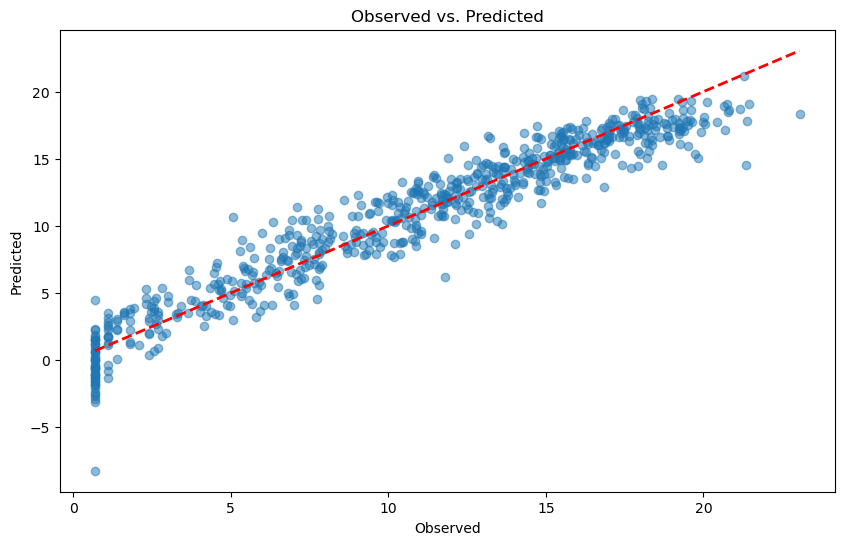

In [6]:
# Linear regression
mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)

X = train_data[['logASHARES', 'logPRICEPERSHARE']]
y = train_data['logDSHARES']
reg1 = LinearRegression().fit(X, y)

X_pre = test_data[['logASHARES', 'logPRICEPERSHARE']]
y_true = test_data['logDSHARES']

Ypred=reg1.predict(X_pre)
scores1 = cross_val_score(reg1, X, y, cv=3, scoring=mae_scorer)
print("M of simple linear model:",-scores1)

# Linear regression added year fixed effects
feature_cols = ['logASHARES', 'logPRICEPERSHARE'] + list(year_dummies.columns)
X = train_data[feature_cols]
y = train_data['logDSHARES']
reg2 = LinearRegression().fit(X, y)
#X_test = test_data[feature_cols]
#Ypred2=reg2.predict(X_test)
scores2 = cross_val_score(reg2, X, y, cv=3, scoring=mae_scorer)
print("M of simple linear model added year fixed effects:", -scores2)

# Linear regression added year fixed effects, month fe,dayofweek fe, month fe
feature_cols = ['logASHARES', 'logPRICEPERSHARE'] + list(year_dummies.columns) + list(day_dummies.columns) + list(month_dummies.columns)
X_train = train_data[feature_cols]
y_train = train_data['logDSHARES']

X_test = test_data[feature_cols]
y_test = test_data['logDSHARES']

X = train_data[feature_cols]
y = train_data['logDSHARES']

reg3 = LinearRegression().fit(X_train, y_train)

scores3 = cross_val_score(reg3, X, y, cv=3, scoring=mae_scorer)
print("M of simple linear model added year fe, dayofweek fe, month ef:", -scores3)

Ypred3 = reg3.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, Ypred3, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Observed vs. Predicted')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()

**Considering the plots above, add quadratic terms**

In [7]:
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['logASHARES', 'logPRICEPERSHARE']])
poly_feature_names = poly.get_feature_names_out()
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

df = pd.concat([df,poly_df], axis=1)

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

M of simale linear model added year fe, dayofweek fe, month fe, qudratic: 1.2614730185046295
M of simple linear model added year fe, dayofweek fe, month ef, qudratic: [1.29817873 1.22382724 1.28766256]


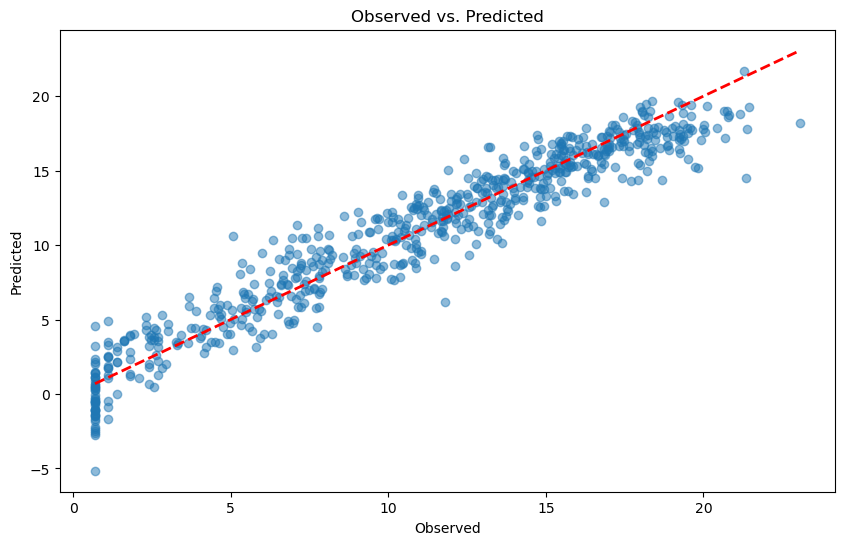

In [10]:
# Linear regression added year fixed effects, dayofweek fe, month ef, and quadratic terms
feature_cols = list(year_dummies.columns) + \
               list(day_dummies.columns) + \
               list(poly_df.columns)+ \
               list(month_dummies.columns)

X_train = train_data[feature_cols]
y_train = train_data['logDSHARES']
X_test = test_data[feature_cols]
y_test = test_data['logDSHARES']
X = train_data[feature_cols]
y = train_data['logDSHARES']

reg4 = LinearRegression().fit(X_train, y_train)
Ypred4 = reg4.predict(X_test)
scores4 = cross_val_score(reg4, X, y, cv=3, scoring=mae_scorer)

print("M of simale linear model added year fe, dayofweek fe, month fe, qudratic:",sum(abs(y_true-Ypred4))/len(y_true))
print("M of simple linear model added year fe, dayofweek fe, month ef, qudratic:", -scores4)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, Ypred4, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Observed vs. Predicted')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()

**With the addition of the quadratic term, there is only a slight decrease in M**
**Next, try Regression Trees**\
There is no negative prediction but MAE beacomes larger.

M of regression trees, qudratic: 1.8271796747891722


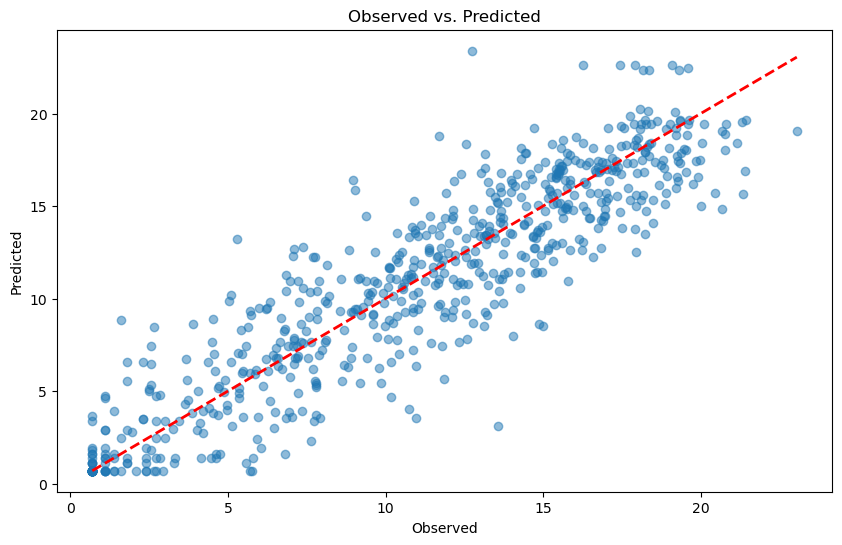

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

X_train = train_data[feature_cols]
y_train = train_data['logDSHARES']
X_test = test_data[feature_cols]
y_test = test_data['logDSHARES']

reg_tree = DecisionTreeRegressor(random_state=42)

reg_tree.fit(X_train, y_train)

Ypred5 = reg_tree.predict(X_test)
print("M of regression trees, qudratic:",sum(abs(y_true-Ypred5))/len(y_true))
#y_test_actual = np.expm1(y_test)
#Ypred_actual = np.expm1(Ypred6)
#mse_actual = mean_squared_error(y_test_actual, Ypred_actual)
#rmse_actual = np.sqrt(mse_actual)
#print("RMSE for DSHARES:", rmse_actual)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, Ypred5, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Observed vs. Predicted')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()

**Try BayesianRidge**

M of Bayesianridge: [1.30202097 1.22847359 1.2850488 ]
M of Bayesianridge: 1.2607013024713458


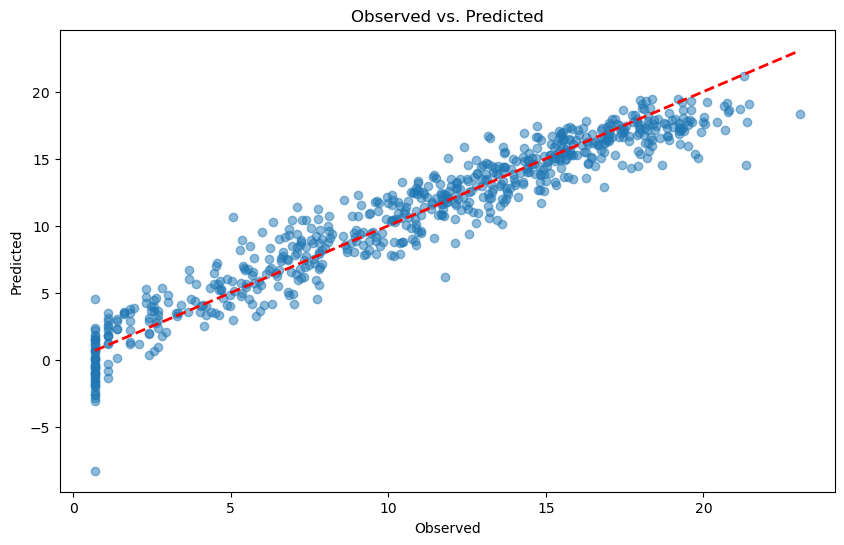

In [9]:
from sklearn.linear_model import BayesianRidge

X_train = train_data[feature_cols]
y_train = train_data['logDSHARES']
X_test = test_data[feature_cols]
y_test = test_data['logDSHARES']
X = train_data[feature_cols]
y = train_data['logDSHARES']

bayes_reg = BayesianRidge()
scores6 = cross_val_score(bayes_reg, X, y, cv=3, scoring=mae_scorer)
print("M of Bayesianridge:", -scores6)

bayes_reg.fit(X_train, y_train)

Ypred6 = bayes_reg.predict(X_test)

print("M of Bayesianridge:",sum(abs(y_true-Ypred6))/len(y_true))

# y_test_actual = np.expm1(y_test)
# Ypred_actual = np.expm1(Ypred6)
# mse_actual = mean_squared_error(y_test_actual, Ypred_actual)
# rmse_actual = np.sqrt(mse_actual)
# print("RMSE for DSHARES:", rmse_actual)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, Ypred6, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Observed vs. Predicted')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()

**The model is better than linear models, next try random forest**

For categorical data with a natural order (e.g., year), it may sometimes be more efficient to treat it as a continuous variable. However, this approach introduces an assumption that differences between categories are uniform and linear.\
Therefore, the indicator variable for year is still retained here as 0/1 dummy.

M of Random Forest: [1.38318091 1.36612498 1.43785378]
M of Random Forest: 1.344851707200532


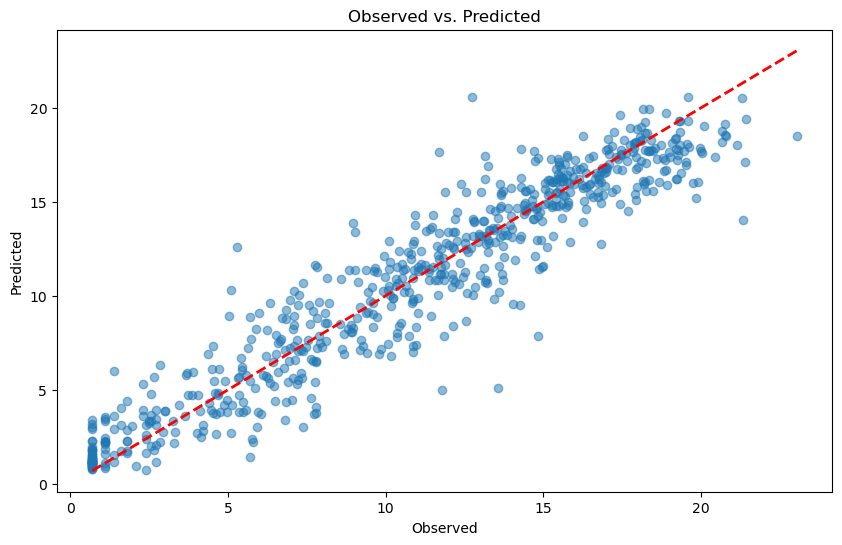

In [13]:
rf_regressor = RandomForestRegressor(n_estimators=80, criterion='absolute_error',random_state=42)

X_train = train_data[feature_cols]
y_train = train_data['logDSHARES']
X_test = test_data[feature_cols]
y_test = test_data['logDSHARES']
X = train_data[feature_cols]
y = train_data['logDSHARES']

rf_regressor.fit(X_train, y_train)
Ypred7 = rf_regressor.predict(X_test)

# cross-validation 3-fold
scores = cross_val_score(rf_regressor, X, y, cv=3, scoring='neg_mean_absolute_error')
print("M of Random Forest:", -scores)
print("M of Random Forest:", sum(abs(y_true-Ypred7))/len(y_true))

#y_test_actual = np.expm1(y_test)
#Ypred_actual = np.expm1(Ypred7)
#mse_actual = mean_squared_error(y_test_actual, Ypred_actual)
#rmse_actual = np.sqrt(mse_actual)
#print("RMSE for DSHARES:", rmse_actual)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, Ypred7, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Observed vs. Predicted')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()

**BayesianRidge with fixed effects, qudratic items performs best.** \
However, how to determine whether it is good enough? Next, I will compare it with Mean Baseline Model.

In [113]:
# the range of original log(1+DSHARES)
min_value = df['logDSHARES'].min()
max_value = df['logDSHARES'].max()
print(min_value, max_value)

0.6931471805599453 23.46167081319313


In [116]:
# Bseline model with mean
mean_value = train_data['logDSHARES'].mean()
predictions = [mean_value] * len(test_data)

mae = mean_absolute_error(test_data['logDSHARES'], predictions)
print("M for Mean Baseline Model:", mae)

M for Mean Baseline Model: 4.917390588046076


**Process testdata**

In [16]:
dt = pd.read_csv('C:/AMS/jupyter_practice/Final Project/Part3/test061.csv')

dt['logASHARES'] = np.log1p(dt['ASHARES'])
dt['logPRICEPERSHARE'] = np.log1p(dt['TRANS_PRICEPERSHARE'])

dt['TRANS_DATE'] = pd.to_datetime(dt['TRANS_DATE'])
dt['YEAR'] = dt['TRANS_DATE'].dt.year
dt['MONTH'] = dt['TRANS_DATE'].dt.month
dt['DAY_OF_WEEK'] = dt['TRANS_DATE'].dt.dayofweek

year_dummies_test = pd.get_dummies(dt['YEAR'], prefix='Year')
day_dummies_test = pd.get_dummies(dt['DAY_OF_WEEK'], prefix='DayOfWeek')
month_dummies_test = pd.get_dummies(dt['MONTH'], prefix='Month')

# make sure match with train dataset
for col in year_dummies.columns:
    if col not in year_dummies_test:
        year_dummies_test[col] = 0
for col in day_dummies.columns:
    if col not in day_dummies_test:
        day_dummies_test[col] = 0
for col in month_dummies.columns:
    if col not in month_dummies_test:
        month_dummies_test[col] = 0
        
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(dt[['logASHARES', 'logPRICEPERSHARE']])
poly_feature_names = poly.get_feature_names_out()
poly_dt = pd.DataFrame(poly_features, columns=poly_feature_names)


dt = pd.concat([dt, year_dummies_test, day_dummies_test, month_dummies_test, poly_dt], axis=1)

In [25]:
feature_cols_test = list(year_dummies_test.columns) + \
                    list(day_dummies_test.columns) + \
                    list(poly_dt.columns)+ \
                    list(month_dummies_test.columns)

X_train = df[feature_cols_test]
y_train = df['logDSHARES']
X_test = dt[feature_cols_test]

bayes_reg_final = BayesianRidge()
bayes_reg_final.fit(X_train, y_train)

prediction = bayes_reg.predict(X_test)
predicted_dshares = np.expm1(prediction)

result_df = pd.DataFrame({
    'TRANS_DATE': dt['TRANS_DATE'],
    'DSHARES': predicted_dshares
})

result_df.to_csv('predicted_dshares.csv', index=False)

In [30]:
predicted_dshares_df = pd.read_csv('C:/AMS/jupyter_practice/Final Project/Part3/predicted_dshares.csv')

min_value = predicted_dshares_df['DSHARES'].min()
max_value = predicted_dshares_df['DSHARES'].max()
print(min_value, max_value)

# The shares to be processed should not be negative, replacing negative values with 0
predicted_dshares_df.loc[predicted_dshares_df['DSHARES'] < 0, 'DSHARES'] = 0
min_value = predicted_dshares_df['DSHARES'].min()
max_value = predicted_dshares_df['DSHARES'].max()
print(min_value, max_value)

predicted_dshares_df.to_csv('predicted_dshares.csv', index=False)

-0.9033768307635612 2068353488.702576
0.0 2068353488.702576


In the following cell assign a value to the variable **M**.

In [11]:
# Mean value of MAE obtained with cross-validation
M = np.mean(-scores6)

In [12]:
# Print cell for M - do not modify or delete this line
# Do execute it
print(M)

1.271847787527226


**Make sure you successfully print the value of M in the cell above**

**Make sure you save your notebook before submitting it**